In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Read data from files
train_data = pd.read_csv('application_train.csv')
test_data = pd.read_csv('application_test.csv')

C:\Users\Anna\Downloads\anaconda\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [22]:
# Display the shape of the data tables
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (307511, 122)
Test data shape: (48744, 121)


In [23]:
# Identify the differing column
for col in train_data.columns:
    if col not in test_data.columns:
        print("Differing column:", col)
        break

Differing column: TARGET


In [24]:
# Display NaN values
train_null = train_data.isnull().sum()
print("Train data - NaN values:")
print(train_null.to_string())

test_null = test_data.isnull().sum()
print("Test data - NaN values:")
print(test_null.to_string())

Train data - NaN values:
SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0


In [25]:
# Calculate the correlation of NaN values to the overall data
overall_amount_train = train_data.shape[0]
null_train_correlation = train_null / overall_amount_train
print("Train data - NaN correlation:")
print(null_train_correlation.sort_values(ascending=False).to_string())

overall_amount_test = test_data.shape[0]
null_test_correlation = test_null / overall_amount_test
print("Test data - NaN correlation:")
print(null_test_correlation.sort_values(ascending=False).to_string())


Train data - NaN correlation:
COMMONAREA_MEDI                 0.698723
COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
NONLIVINGAPARTMENTS_MEDI        0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_MODE           0.683550
LIVINGAPARTMENTS_AVG            0.683550
LIVINGAPARTMENTS_MEDI           0.683550
FLOORSMIN_AVG                   0.678486
FLOORSMIN_MODE                  0.678486
FLOORSMIN_MEDI                  0.678486
YEARS_BUILD_MEDI                0.664978
YEARS_BUILD_MODE                0.664978
YEARS_BUILD_AVG                 0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MEDI                   0.593767
LANDAREA_MODE                   0.593767
LANDAREA_AVG                    0.593767
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MODE               0.585160
EXT_SOURCE_1               

In [26]:
# Remove features with more than n missing values
n = 0.5
for col in train_data.columns:
    if col == 'TARGET':
        continue
    if (train_data[col].isnull().sum() / overall_amount_train > n) and (test_data[col].isnull().sum() / overall_amount_test > n):
        train_data.drop(columns=col, inplace=True)
        test_data.drop(columns=col, inplace=True)

In [27]:
# Check for remaining NaN values
null_train = train_data.isnull().sum() / overall_amount_train
print("Train data - Remaining NaN values:")
print(null_train.sort_values(ascending=False).to_string())

null_test = test_data.isnull().sum() / overall_amount_test
print("Test data - Remaining NaN values:")
print(null_test.sort_values(ascending=False).to_string())


Train data - Remaining NaN values:
EXT_SOURCE_1                    0.563811
WALLSMATERIAL_MODE              0.508408
APARTMENTS_AVG                  0.507497
APARTMENTS_MODE                 0.507497
APARTMENTS_MEDI                 0.507497
ENTRANCES_AVG                   0.503488
ENTRANCES_MODE                  0.503488
ENTRANCES_MEDI                  0.503488
LIVINGAREA_MODE                 0.501933
LIVINGAREA_MEDI                 0.501933
LIVINGAREA_AVG                  0.501933
HOUSETYPE_MODE                  0.501761
FLOORSMAX_MODE                  0.497608
FLOORSMAX_AVG                   0.497608
FLOORSMAX_MEDI                  0.497608
YEARS_BEGINEXPLUATATION_MEDI    0.487810
YEARS_BEGINEXPLUATATION_MODE    0.487810
YEARS_BEGINEXPLUATATION_AVG     0.487810
TOTALAREA_MODE                  0.482685
EMERGENCYSTATE_MODE             0.473983
OCCUPATION_TYPE                 0.313455
EXT_SOURCE_3                    0.198253
AMT_REQ_CREDIT_BUREAU_HOUR      0.135016
AMT_REQ_CREDIT_BUREAU_

In [28]:
# Check feature types
train_data.dtypes
test_data.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 92, dtype: object

In [29]:
# Check for duplicates
print("Duplicate rows in train data:", train_data.duplicated().sum())
print("Duplicate rows in test data:", test_data.duplicated().sum())

Duplicate rows in train data: 0
Duplicate rows in test data: 0


In [30]:
# Define categorical and numerical features
categorical_features = train_data.select_dtypes(exclude=['float64', 'int64']).columns
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns

In [33]:
# Display statistical data
print("Train data - Statistical summary:")
print(train_data.describe())


Train data - Statistical summary:
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.3

In [34]:
print("Test data - Statistical summary:")
print(test_data.describe(include='all'))

Test data - Statistical summary:
           SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
count    48744.000000              48744       48744        48744   
unique            NaN                  2           2            2   
top               NaN         Cash loans           F            N   
freq              NaN              48305       32678        32311   
mean    277796.676350                NaN         NaN          NaN   
std     103169.547296                NaN         NaN          NaN   
min     100001.000000                NaN         NaN          NaN   
25%     188557.750000                NaN         NaN          NaN   
50%     277549.000000                NaN         NaN          NaN   
75%     367555.500000                NaN         NaN          NaN   
max     456250.000000                NaN         NaN          NaN   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count            48744  48744.000000      4.874400e+04  4.874400e+

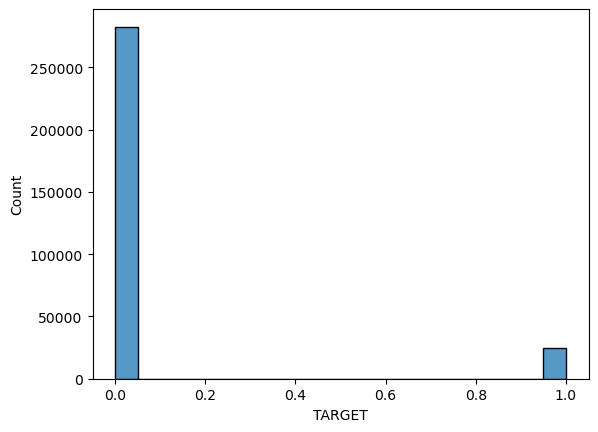

In [35]:
# Check dataset balance
sns.histplot(train_data['TARGET'])
plt.show()

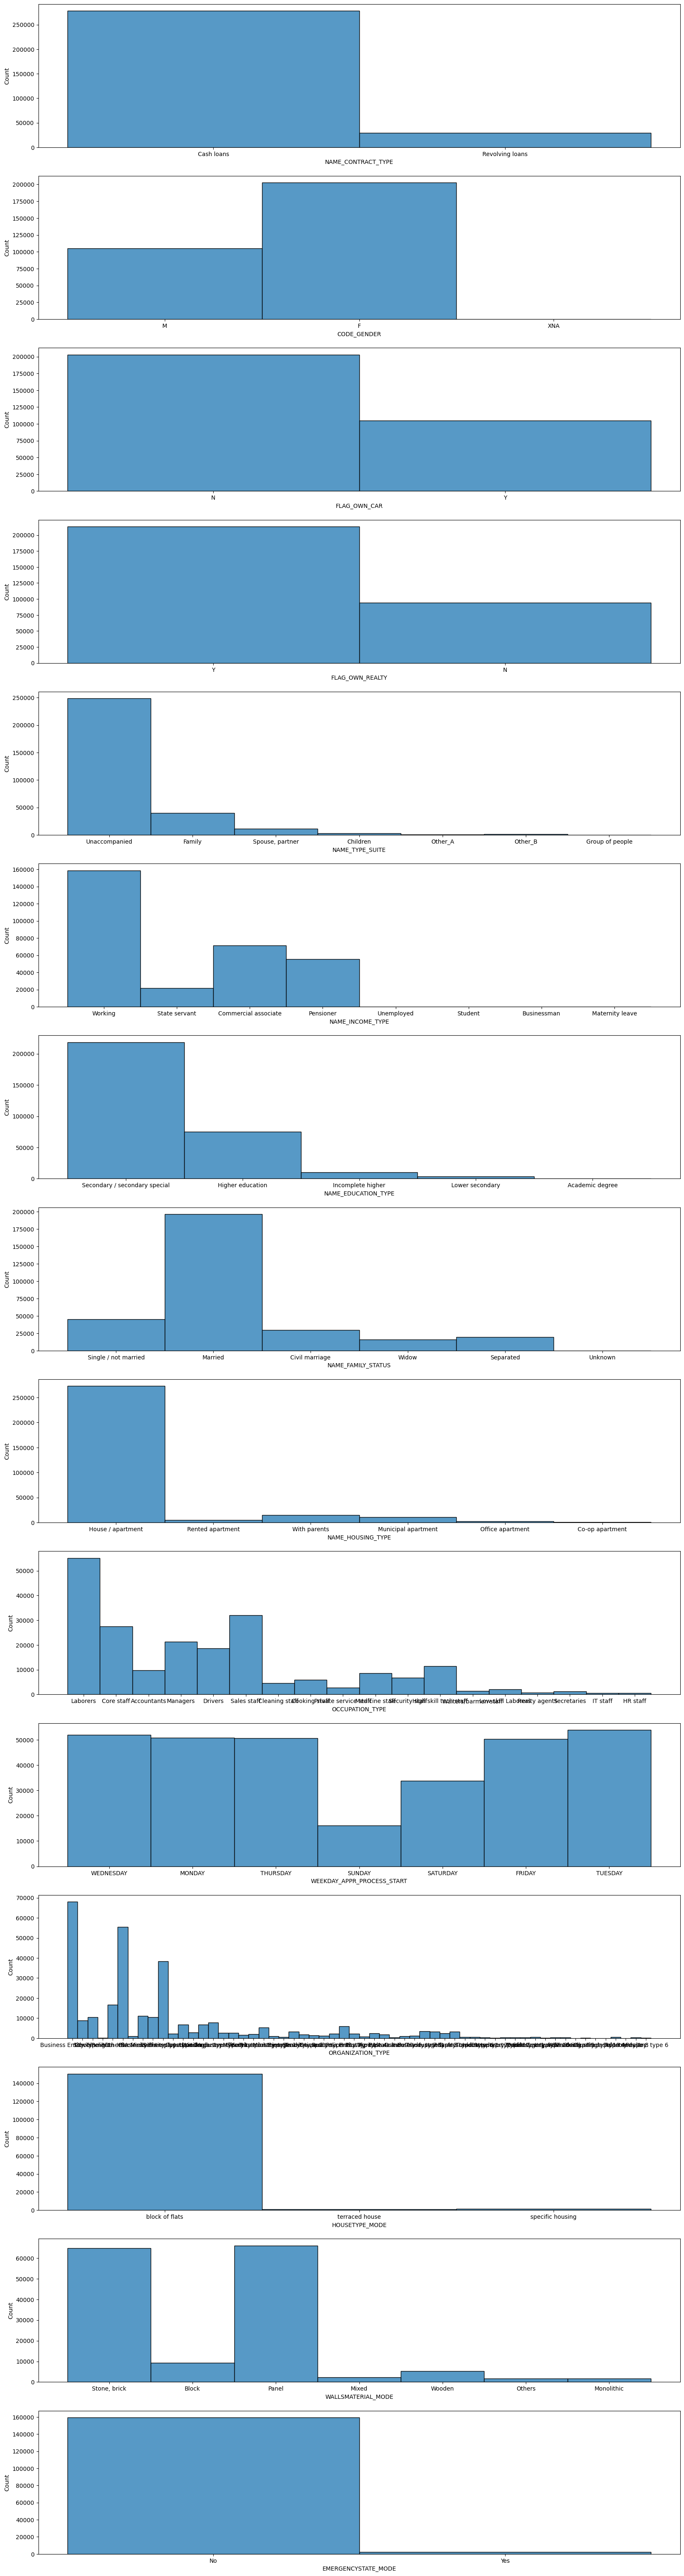

In [36]:
# Visualize the distribution of categorical features
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1)
fig.set_size_inches(20, 80)

for i, col in enumerate(categorical_features):
    sns.histplot(train_data[col], kde=False, ax=axes[i])

plt.show()

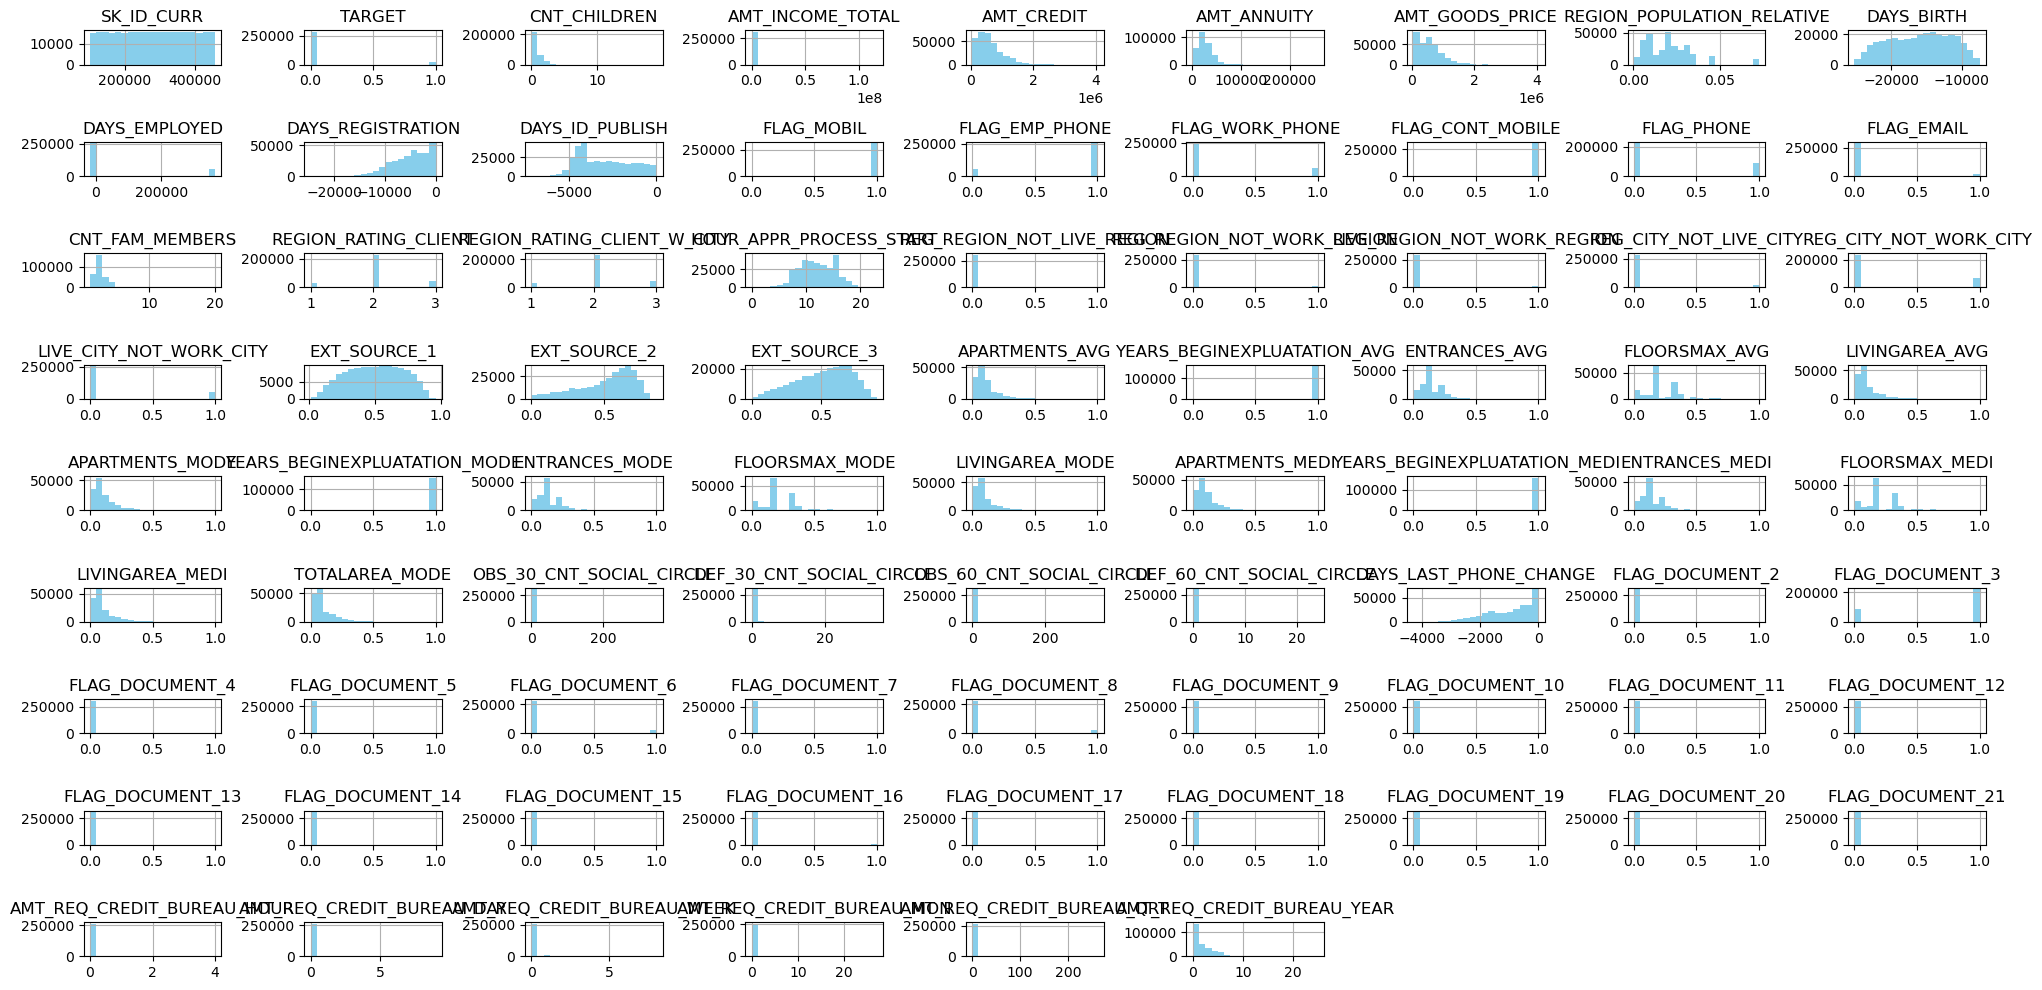

In [37]:
# Visualize the distribution of numerical features
train_data[numerical_features].hist(bins=20, figsize=(20, 10), color='skyblue')
plt.tight_layout()
plt.show()

In [39]:
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop('TARGET')

scaler = StandardScaler()
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

C:\Users\Anna\AppData\Local\Temp\ipykernel_9088\3600347394.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatt = train_data.corr()


<Axes: >

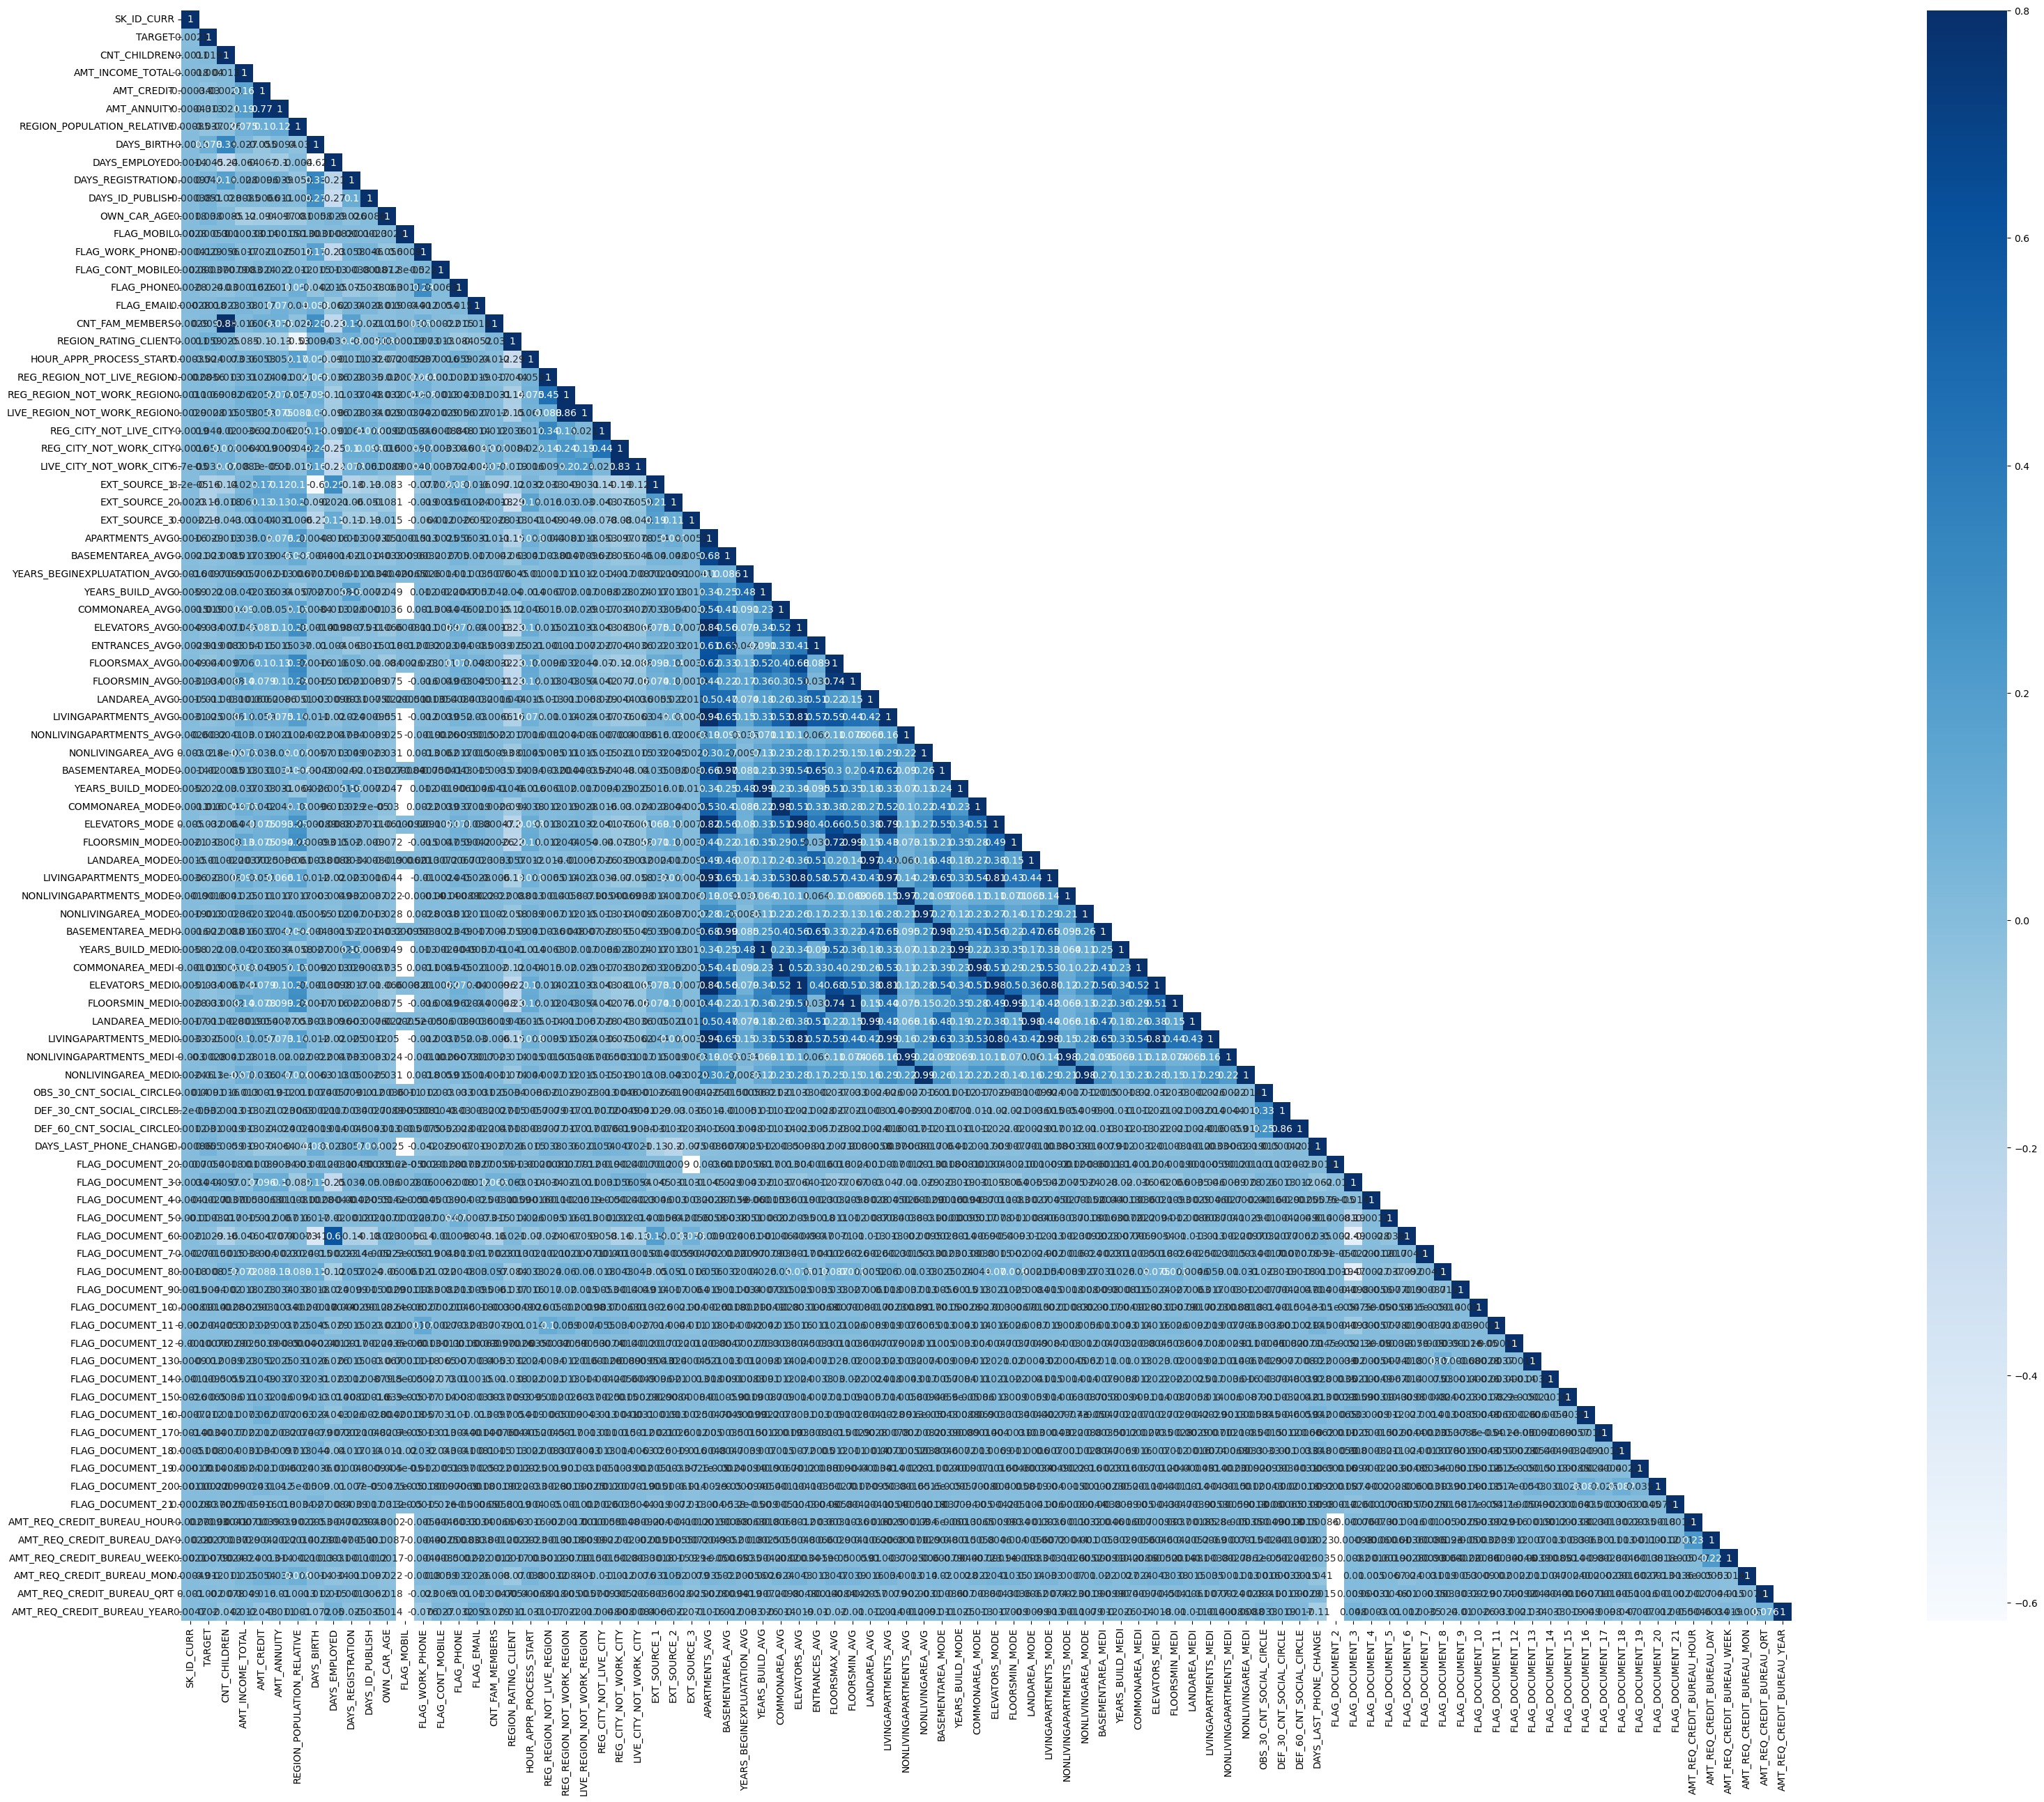

In [87]:
# виведення кореляції фіч у вигляді матриці
corrMatt = train_data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(50,30)
sns.heatmap(corrMatt, cmap="Blues", mask=mask,vmax=.8, square=True,annot=True)

In [70]:
# Remove highly correlated features
correlation_matrix = train_data[numerical_features].corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
train_data.drop(columns=to_drop, inplace=True)
test_data.drop(columns=to_drop, inplace=True)

C:\Users\Anna\AppData\Local\Temp\ipykernel_9088\2272546059.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


In [71]:
# Perform one-hot encoding on categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
train_encoded = pd.DataFrame(encoder.fit_transform(train_data[categorical_features]))
test_encoded = pd.DataFrame(encoder.transform(test_data[categorical_features]))

C:\Users\Anna\Downloads\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [74]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_processed, train_data['TARGET'], test_size=0.2, random_state=42)

In [75]:
# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)

In [76]:
# Create a HistGradientBoostingClassifier object
clf = HistGradientBoostingClassifier()

# Fit the model on the training data
clf.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [77]:
# Make predictions on the test data
y_pred = clf.predict(X_val)

In [78]:
# Convert string labels to numerical values
y_val_numeric = y_val.astype(int)
y_pred_numeric = y_pred.astype(float)

# Convert continuous predictions into binary labels
y_pred_binary = np.where(y_pred_numeric >= 0.5, 1, 0)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_val_numeric, y_pred_binary)
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.5093199708712569


In [84]:
# Convert column names to string type
test_processed.columns = test_processed.columns.astype(str)

# Make predictions on the test data
validateSubmission = clf.predict(test_processed)

# Read the sample submission file
submission_df = pd.read_csv("sample_submission.csv")

# Update the TARGET column with the predictions
submission_df["TARGET"] = validateSubmission

# Save the submission file
submission_df.to_csv("submission.csv", index=False)

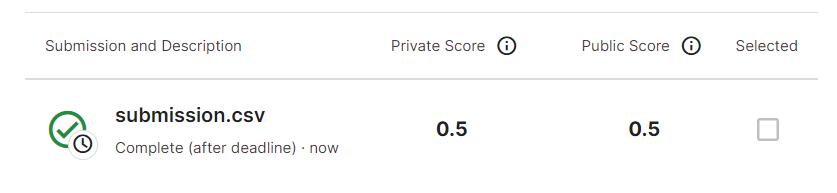